In [1]:
import csv as csv
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [2]:
df = pd.read_csv('data/201508-citibike-tripdata.csv', header=0)

In [3]:
original = datetime.today()
df['month'] = df['starttime'].apply(lambda a: int(re.search('(.)/', a).group(1)))
df['day'] = df['starttime'].apply(lambda a: int(re.search('/(.+)/', a).group(1)))
df['year'] = df['starttime'].apply(lambda a: int(re.search('/(\d{4})\s', a).group(1)))
df['hour'] = df['starttime'].apply(lambda a: int(re.search('\s(\d{2}):',a).group(1)))
df['minute'] = df['starttime'].apply(lambda a: int(re.search(':(\d{2}):',a).group(1)))
df['second'] = df['starttime'].apply(lambda a: int(re.search(':(\d{2})$',a).group(1)))

```SELECT * FROM df
WHERE hour > 18 AND hour < 7
LIMIT 100;```

```SELECT * FROM df
WHERE hour > 21 AND hour < 4
LIMIT 100;```

In [4]:
night = df[(df['hour']>18) | (df['hour']<7)]
late_night = df[(df['hour']>21) | (df['hour']<4)]

In [5]:
print night.head(100)

    tripduration          starttime           stoptime  start station id  \
0           1202  8/1/2015 00:00:04  8/1/2015 00:20:07               168   
1            301  8/1/2015 00:00:05  8/1/2015 00:05:06               450   
2            431  8/1/2015 00:00:06  8/1/2015 00:07:18               312   
3            273  8/1/2015 00:00:09  8/1/2015 00:04:43               382   
4           1256  8/1/2015 00:00:17  8/1/2015 00:21:13               352   
5            739  8/1/2015 00:00:24  8/1/2015 00:12:44               212   
6            433  8/1/2015 00:00:30  8/1/2015 00:07:43               388   
7           1575  8/1/2015 00:00:33  8/1/2015 00:26:49               492   
8            843  8/1/2015 00:00:39  8/1/2015 00:14:43               387   
9            467  8/1/2015 00:00:49  8/1/2015 00:08:37               285   
10          1540  8/1/2015 00:00:48  8/1/2015 00:26:29               492   
11          1593  8/1/2015 00:00:56  8/1/2015 00:27:29               492   
12          

In [6]:
print late_night.head()

   tripduration          starttime           stoptime  start station id  \
0          1202  8/1/2015 00:00:04  8/1/2015 00:20:07               168   
1           301  8/1/2015 00:00:05  8/1/2015 00:05:06               450   
2           431  8/1/2015 00:00:06  8/1/2015 00:07:18               312   
3           273  8/1/2015 00:00:09  8/1/2015 00:04:43               382   
4          1256  8/1/2015 00:00:17  8/1/2015 00:21:13               352   

        start station name  start station latitude  start station longitude  \
0          W 18 St & 6 Ave               40.739713               -73.994564   
1          W 49 St & 8 Ave               40.762272               -73.987882   
2  Allen St & E Houston St               40.722055               -73.989111   
3  University Pl & E 14 St               40.734927               -73.992005   
4          W 56 St & 6 Ave               40.763406               -73.977225   

   end station id      end station name  end station latitude   ...    bik

In [7]:
print df.describe()

         tripduration  start station id  start station latitude  \
count  1179044.000000    1179044.000000          1179044.000000   
mean      1017.478667        518.690223               40.734407   
std       7820.897735        547.230352                0.019571   
min         60.000000         72.000000               40.678907   
25%        415.000000        307.000000               40.720434   
50%        680.000000        417.000000               40.735877   
75%       1145.000000        496.000000               40.750020   
max    2842280.000000       3224.000000               40.771639   

       start station longitude  end station id  end station latitude  \
count           1179044.000000  1179044.000000        1179044.000000   
mean                -73.990754      517.945275             40.734110   
std                   0.013562      547.811466              0.019617   
min                 -74.017134       72.000000             40.678907   
25%                 -74.001497      

In [8]:
print night.describe()

         tripduration  start station id  start station latitude  \
count   292271.000000     292271.000000           292271.000000   
mean      1008.473567        514.127426               40.733731   
std      10829.340925        544.607868                0.018968   
min         60.000000         72.000000               40.678907   
25%        409.000000        307.000000               40.720664   
50%        669.000000        412.000000               40.734546   
75%       1102.000000        492.000000               40.747804   
max    2712082.000000       3224.000000               40.771639   

       start station longitude  end station id  end station latitude  \
count            292271.000000   292271.000000         292271.000000   
mean                -73.991125      518.934085             40.732797   
std                   0.013434      556.915097              0.019454   
min                 -74.017134       72.000000             40.678907   
25%                 -74.001497      

In [9]:
print late_night.describe()

         tripduration  start station id  start station latitude  \
count    77811.000000      77811.000000            77811.000000   
mean      1145.340325        515.932105               40.733015   
std      18422.226723        562.706097                0.018722   
min         60.000000         72.000000               40.679427   
25%        408.000000        304.000000               40.720874   
50%        673.000000        404.000000               40.732916   
75%       1102.000000        488.000000               40.746745   
max    2712082.000000       3224.000000               40.771639   

       start station longitude  end station id  end station latitude  \
count             77811.000000    77811.000000          77811.000000   
mean                -73.990618      531.657169             40.731919   
std                   0.013483      582.982519              0.019574   
min                 -74.017134       72.000000             40.678907   
25%                 -74.000040      

```SELECT * FROM df 
WHERE "birth year" IS NULL```

In [10]:
null_birth = df[df['birth year'].isnull()]
print null_birth

         tripduration           starttime            stoptime  \
7                1575   8/1/2015 00:00:33   8/1/2015 00:26:49   
8                 843   8/1/2015 00:00:39   8/1/2015 00:14:43   
10               1540   8/1/2015 00:00:48   8/1/2015 00:26:29   
11               1593   8/1/2015 00:00:56   8/1/2015 00:27:29   
25               2183   8/1/2015 00:02:10   8/1/2015 00:38:33   
26               2150   8/1/2015 00:02:19   8/1/2015 00:38:10   
34               1424   8/1/2015 00:03:36   8/1/2015 00:27:21   
40                793   8/1/2015 00:03:53   8/1/2015 00:17:07   
44               1397   8/1/2015 00:04:04   8/1/2015 00:27:22   
48               1464   8/1/2015 00:04:34   8/1/2015 00:28:58   
49               1367   8/1/2015 00:04:59   8/1/2015 00:27:46   
50               1316   8/1/2015 00:05:21   8/1/2015 00:27:17   
51               1316   8/1/2015 00:05:21   8/1/2015 00:27:17   
61               5573   8/1/2015 00:06:12   8/1/2015 01:39:05   
73               3657   8

```SELECT usertype, count(*) FROM df 
WHERE "birth year" IS NULL
GROUP BY usertype```

In [11]:
null_birth = df[df['birth year'].isnull()].groupby('usertype').size()
print null_birth

usertype
Customer      220996
Subscriber         5
dtype: int64


```SELECT * FROM df
WHERE "birth year" IS NULL AND usertype = 'Subscriber'```

In [12]:
null_birth_subscriber = df[(df['birth year'].isnull()) & (df['usertype'] == 'Subscriber')]
print null_birth_subscriber

        tripduration           starttime            stoptime  \
90077            454   8/3/2015 17:24:11   8/3/2015 17:31:46   
138689           410   8/4/2015 19:16:04   8/4/2015 19:22:54   
263214           503   8/7/2015 18:52:02   8/7/2015 19:00:26   
464355           630  8/13/2015 11:44:57  8/13/2015 11:55:28   
672999           238  8/18/2015 20:10:37  8/18/2015 20:14:36   

        start station id     start station name  start station latitude  \
90077                468     Broadway & W 55 St               40.765265   
138689               447        8 Ave & W 52 St               40.763707   
263214               447        8 Ave & W 52 St               40.763707   
464355               468     Broadway & W 55 St               40.765265   
672999               284  Greenwich Ave & 8 Ave               40.739017   

        start station longitude  end station id    end station name  \
90077                -73.981923             529     W 42 St & 8 Ave   
138689               -

```SELECT "birth year", AVG(tripduration), COUNT(*) FROM df
WHERE "birth year" IS NOT NULL
GROUP BY "birth year"```

In [13]:
age_duration = df[df['birth year'].notnull()].groupby(['birth year']).agg({'tripduration': np.mean , 'birth year': np.size})
age_duration['tripduration'] = age_duration['tripduration'].apply(lambda a: a / 60)
print age_duration
#HOW DO WE ALIAS COLUMN NAMES? HOW DO WE SET COLUMN ORDER WHEN USING A DICTIONARY?
#BIRTH YEAR IS A COUNT.

            birth year  tripduration
birth year                          
1885               100     14.820333
1899                24     16.311111
1900               154     20.519048
1901                22     14.593182
1907                10     10.173333
1910                28      9.137500
1913                13     23.576923
1917                 3     17.222222
1921                 1     38.866667
1925                12     12.948611
1926                10     12.883333
1930                 6     56.383333
1931                 2      8.058333
1932                75     10.345333
1934                10     13.970000
1935                53     13.442138
1936                72     14.847685
1937                77      9.726840
1938               146     20.561073
1939               123     15.397425
1940               583     14.993796
1941               595     11.938627
1942              1017     15.008276
1943               407     11.669328
1944               732     13.425023
1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108e26990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109295590>]], dtype=object)

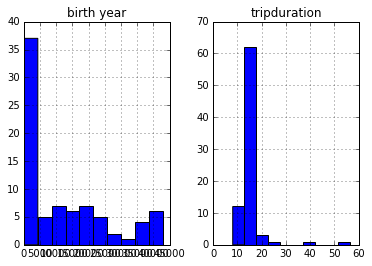

In [14]:
%matplotlib inline
age_duration.hist()

In [15]:
import math

def harversine(point1, point2, R=6371000.):
    """ Returns thet distance along an arc between two locations.
    Default R is radius of earth in meters
    """
    lat1, lng1 = point1[0] * math.pi / 180, point1[1] * math.pi / 180
    lat2, lng2 = point2[0] * math.pi / 180,  point2[1] * math.pi / 180
    delta_lat = lat2 - lat1
    delta_lng = lng2 - lng1

    a = (math.sin(delta_lat / 2.) * math.sin(delta_lat / 2.) +
            math.cos(lat1) * math.cos(lat2) *
            math.sin(delta_lng / 2.) * math.sin(delta_lng / 2.))

    c = 2. * math.atan2(math.sqrt(a), math.sqrt(1. - a))

    distance = R * c

    return distance


In [16]:
# add column distance
distance = np.vectorize(harversine)
df['start_loc'] = zip(df['start station latitude'], df['start station longitude'])
df['end_loc'] = zip(df['end station latitude'], df['end station longitude'])
df['distance'] = distance(df['start_loc'], df['end_loc'])

In [17]:
df['distance'].head()

0    3146.284497
1     366.299455
2    1106.202057
3     846.622176
4    4172.063739
Name: distance, dtype: float64

In [18]:
df['trip_hours'] = df['tripduration'].apply(lambda x: x / (60 * 60.))

In [19]:
df['distance_mi'] = df['distance'].apply(lambda x: x * .000621371)

In [20]:
df['mph'] = df['distance_mi'] / df['trip_hours']

In [21]:
df['mph'].head()

0    5.855271
1    2.722220
2    5.741306
3    6.937140
4    7.430444
Name: mph, dtype: float64

In [22]:
age_mph = df[df['birth year'].notnull()].groupby(['birth year']).agg({'mph': np.mean , 'birth year': np.size})
# also rename function on dataframe w/ columns=[...], inplace=True
age_mph.columns = ['birth_year_ct', 'mph']
print age_mph

            birth_year_ct       mph
birth year                         
1885                  100  3.927741
1899                   24  4.485847
1900                  154  5.382006
1901                   22  8.410577
1907                   10  5.396524
1910                   28  4.641783
1913                   13  6.167832
1917                    3  2.961779
1921                    1  6.519952
1925                   12  4.949129
1926                   10  4.711407
1930                    6  0.157004
1931                    2  2.079855
1932                   75  5.715078
1934                   10  4.027435
1935                   53  6.316692
1936                   72  5.004097
1937                   77  3.565628
1938                  146  3.660253
1939                  123  4.695643
1940                  583  4.706003
1941                  595  4.569853
1942                 1017  4.291992
1943                  407  4.591090
1944                  732  4.740689
1945                  902  4

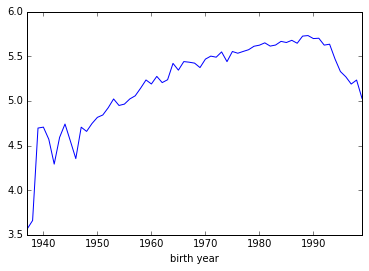

In [23]:
age_mph[(age_mph.index > 1936)]['mph'].plot()

In [24]:
df.bikeid

0          23253
1          22675
2          19831
3          22765
4          22127
5          19293
6          19115
7          20532
8          24273
9          17688
10         21648
11         24289
12         22864
13         15661
14         21920
15         22989
16         16697
17         21992
18         15161
19         18845
20         14590
21         20333
22         22595
23         23247
24         21251
25         21587
26         18654
27         19853
28         23084
29         22967
           ...  
1179014    23336
1179015    23096
1179016    18925
1179017    23409
1179018    19842
1179019    14592
1179020    21530
1179021    23977
1179022    23931
1179023    23345
1179024    22063
1179025    20660
1179026    14794
1179027    19364
1179028    21531
1179029    16678
1179030    22296
1179031    21464
1179032    23344
1179033    24042
1179034    22564
1179035    18761
1179036    22515
1179037    16929
1179038    15614
1179039    18686
1179040    23487
1179041    235

In [25]:
# average birth year by hour, exclude rediculous people (before 1940)
df['age'] = 2016 - df['birth year']

In [26]:
df[df['birth year'].isnull()][['birth year', 'age']].head()

,birth year,age
7,NaN,NaN
8,NaN,NaN
10,NaN,NaN
11,NaN,NaN
25,NaN,NaN


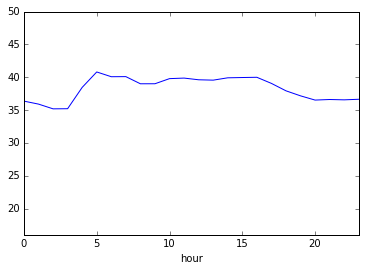

In [27]:

df[df.age < 75].groupby('hour').agg({'age': np.mean, 'hour': np.size})['age'].plot(ylim=[16,50])

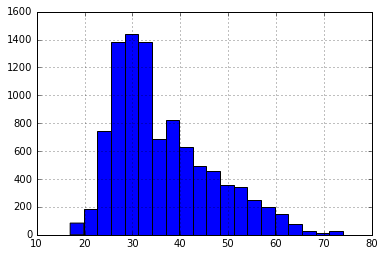

In [28]:
df[(df.age < 75) & (df.hour == 0)]['age'].hist(bins=20)

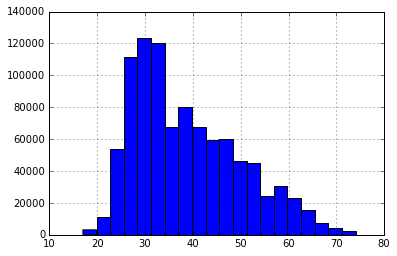

In [29]:
df[(df.age < 75)]['age'].hist(bins=20)

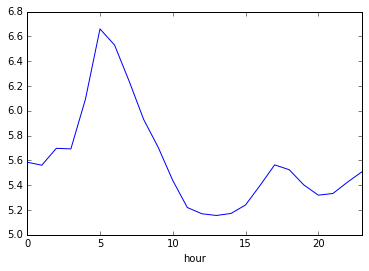

In [30]:
# average speed
df[df.age < 75].groupby('hour').agg({'mph': np.mean, 'hour': np.size})['mph'].plot()

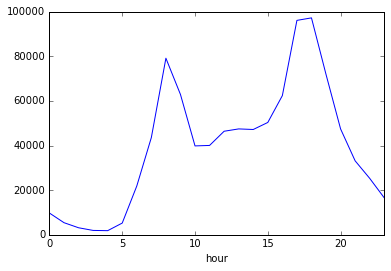

In [31]:
df[df.age < 75].groupby('hour').agg({'mph': np.mean, 'hour': np.size})['hour'].plot()

In [52]:
bikeid_info = df.groupby('bikeid').agg({'distance_mi': np.sum, 'bikeid': np.size, 'mph': np.mean }).sort_values(by='distance_mi', ascending=False)
bikeid_info.columns = ['total_distance_mi', "avg_mph", "num_trips"]

In [53]:
print bikeid_info

        total_distance_mi   avg_mph  num_trips
bikeid                                        
22125          569.211743  5.379857        472
22301          554.560963  5.481011        475
22306          547.695614  5.300381        464
24066          542.853147  5.370236        474
24021          542.817374  5.189220        465
22058          542.590701  5.570141        454
21969          537.498379  5.406001        458
22286          532.572225  5.343431        446
22251          526.760797  5.362956        475
22300          522.454527  5.408411        472
22747          518.136635  5.240369        458
21924          516.117749  5.233148        449
23305          515.706300  5.334540        441
22319          515.676853  5.518253        471
22137          515.337792  5.219431        446
22409          514.984919  5.297641        445
22989          512.354035  5.571494        417
22502          507.790663  5.474871        461
22476          506.529478  5.428297        435
22453        

In [60]:
bikeid_info.to_json('trips_json')

In [58]:
bikeid_info.describe()

,total_distance_mi,avg_mph,num_trips
count,7831.000000,7831.000000,7831.000000
mean,164.063403,5.066728,150.561103
std,97.319516,0.422734,84.432526
min,0.000000,0.000000,1.000000
25%,107.553668,4.888673,101.000000
50%,146.831298,5.081084,138.000000
75%,187.499558,5.285520,174.000000
max,569.211743,7.676266,475.000000


In [55]:
bikeid_info['num_trips'].idxmax()

22301

In [57]:
df[df['bikeid'] == 22251]



,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,hour,minute,second,start_loc,end_loc,distance,trip_hours,distance_mi,mph,age
279,426,8/1/2015 00:28:34,8/1/2015 00:35:41,376,John St & William St,40.708621,-74.007222,355,Bayard St & Baxter St,40.716021,...,0,28,34,"(40.70862144, -74.00722156)","(40.71602118, -73.99974372)",1036.466591,0.118333,0.644030,5.442509,30
2453,621,8/1/2015 08:21:33,8/1/2015 08:31:55,355,Bayard St & Baxter St,40.716021,-73.999744,293,Lafayette St & E 8 St,40.730287,...,8,21,33,"(40.71602118, -73.99974372)","(40.73028666, -73.9907647)",1757.481745,0.172500,1.092048,6.330714,29
2902,1323,8/1/2015 08:46:03,8/1/2015 09:08:07,293,Lafayette St & E 8 St,40.730287,-73.990765,3016,Mobile 01,40.771052,...,8,46,3,"(40.73028666, -73.9907647)","(40.7710518564, -73.9643383026)",5049.990813,0.367500,3.137918,8.538552,29
3455,2974,8/1/2015 09:10:33,8/1/2015 10:00:08,3016,Mobile 01,40.771052,-73.964338,491,E 24 St & Park Ave S,40.740964,...,9,10,33,"(40.7710518564, -73.9643383026)","(40.74096374, -73.98602213)",3811.714864,0.826111,2.368489,2.867035,29
5642,2726,8/1/2015 10:18:39,8/1/2015 11:04:05,491,E 24 St & Park Ave S,40.740964,-73.986022,491,E 24 St & Park Ave S,40.740964,...,10,18,39,"(40.74096374, -73.98602213)","(40.74096374, -73.98602213)",0.000000,0.757222,0.000000,0.000000,54
7524,1725,8/1/2015 11:04:43,8/1/2015 11:33:28,491,E 24 St & Park Ave S,40.740964,-73.986022,359,E 47 St & Park Ave,40.755103,...,11,4,43,"(40.74096374, -73.98602213)","(40.75510267, -73.97498696)",1826.444644,0.479167,1.134900,2.368486,49
9040,867,8/1/2015 11:36:22,8/1/2015 11:50:49,359,E 47 St & Park Ave,40.755103,-73.974987,497,E 17 St & Broadway,40.737050,...,11,36,22,"(40.75510267, -73.97498696)","(40.73704984, -73.99009296)",2376.764302,0.240833,1.476852,6.132259,49
10843,733,8/1/2015 12:09:29,8/1/2015 12:21:43,497,E 17 St & Broadway,40.737050,-73.990093,250,Lafayette St & Jersey St,40.724561,...,12,9,29,"(40.73704984, -73.99009296)","(40.72456089, -73.99565293)",1465.603898,0.203611,0.910684,4.472662,51
11780,20815,8/1/2015 12:26:45,8/1/2015 18:13:41,250,Lafayette St & Jersey St,40.724561,-73.995653,417,Barclay St & Church St,40.712912,...,12,26,45,"(40.72456089, -73.99565293)","(40.71291224, -74.01020234)",1783.604338,5.781944,1.108280,0.191679,NaN
27162,484,8/1/2015 18:21:42,8/1/2015 18:29:47,417,Barclay St & Church St,40.712912,-74.010202,268,Howard St & Centre St,40.719105,...,18,21,42,"(40.71291224, -74.01020234)","(40.71910537, -73.99973337)",1119.257071,0.134444,0.695474,5.172946,46
